# Preface

# Преимущества и недостатки квантовых вычислений

# Потенциал квантовых вычислений в экономической сфере

# Модели машинного обучения для решения экономических задач

## Общий обзор

## Изучаемые в данной работе

|||
|---|---|---|
|QAOA (Quantum Annealing Optimisation Algorithm)|Оптимизация|Portfolio optmization, Stock optimisation, Fraud detection|
|QSVM (Quantum Support Vector Machines)|Классификация|Credit scoring, Risk models|
|VQC (Variational Quantum Classifier)|Классификация|General classification|


# Данные по развитию рынка квантовых вычислений

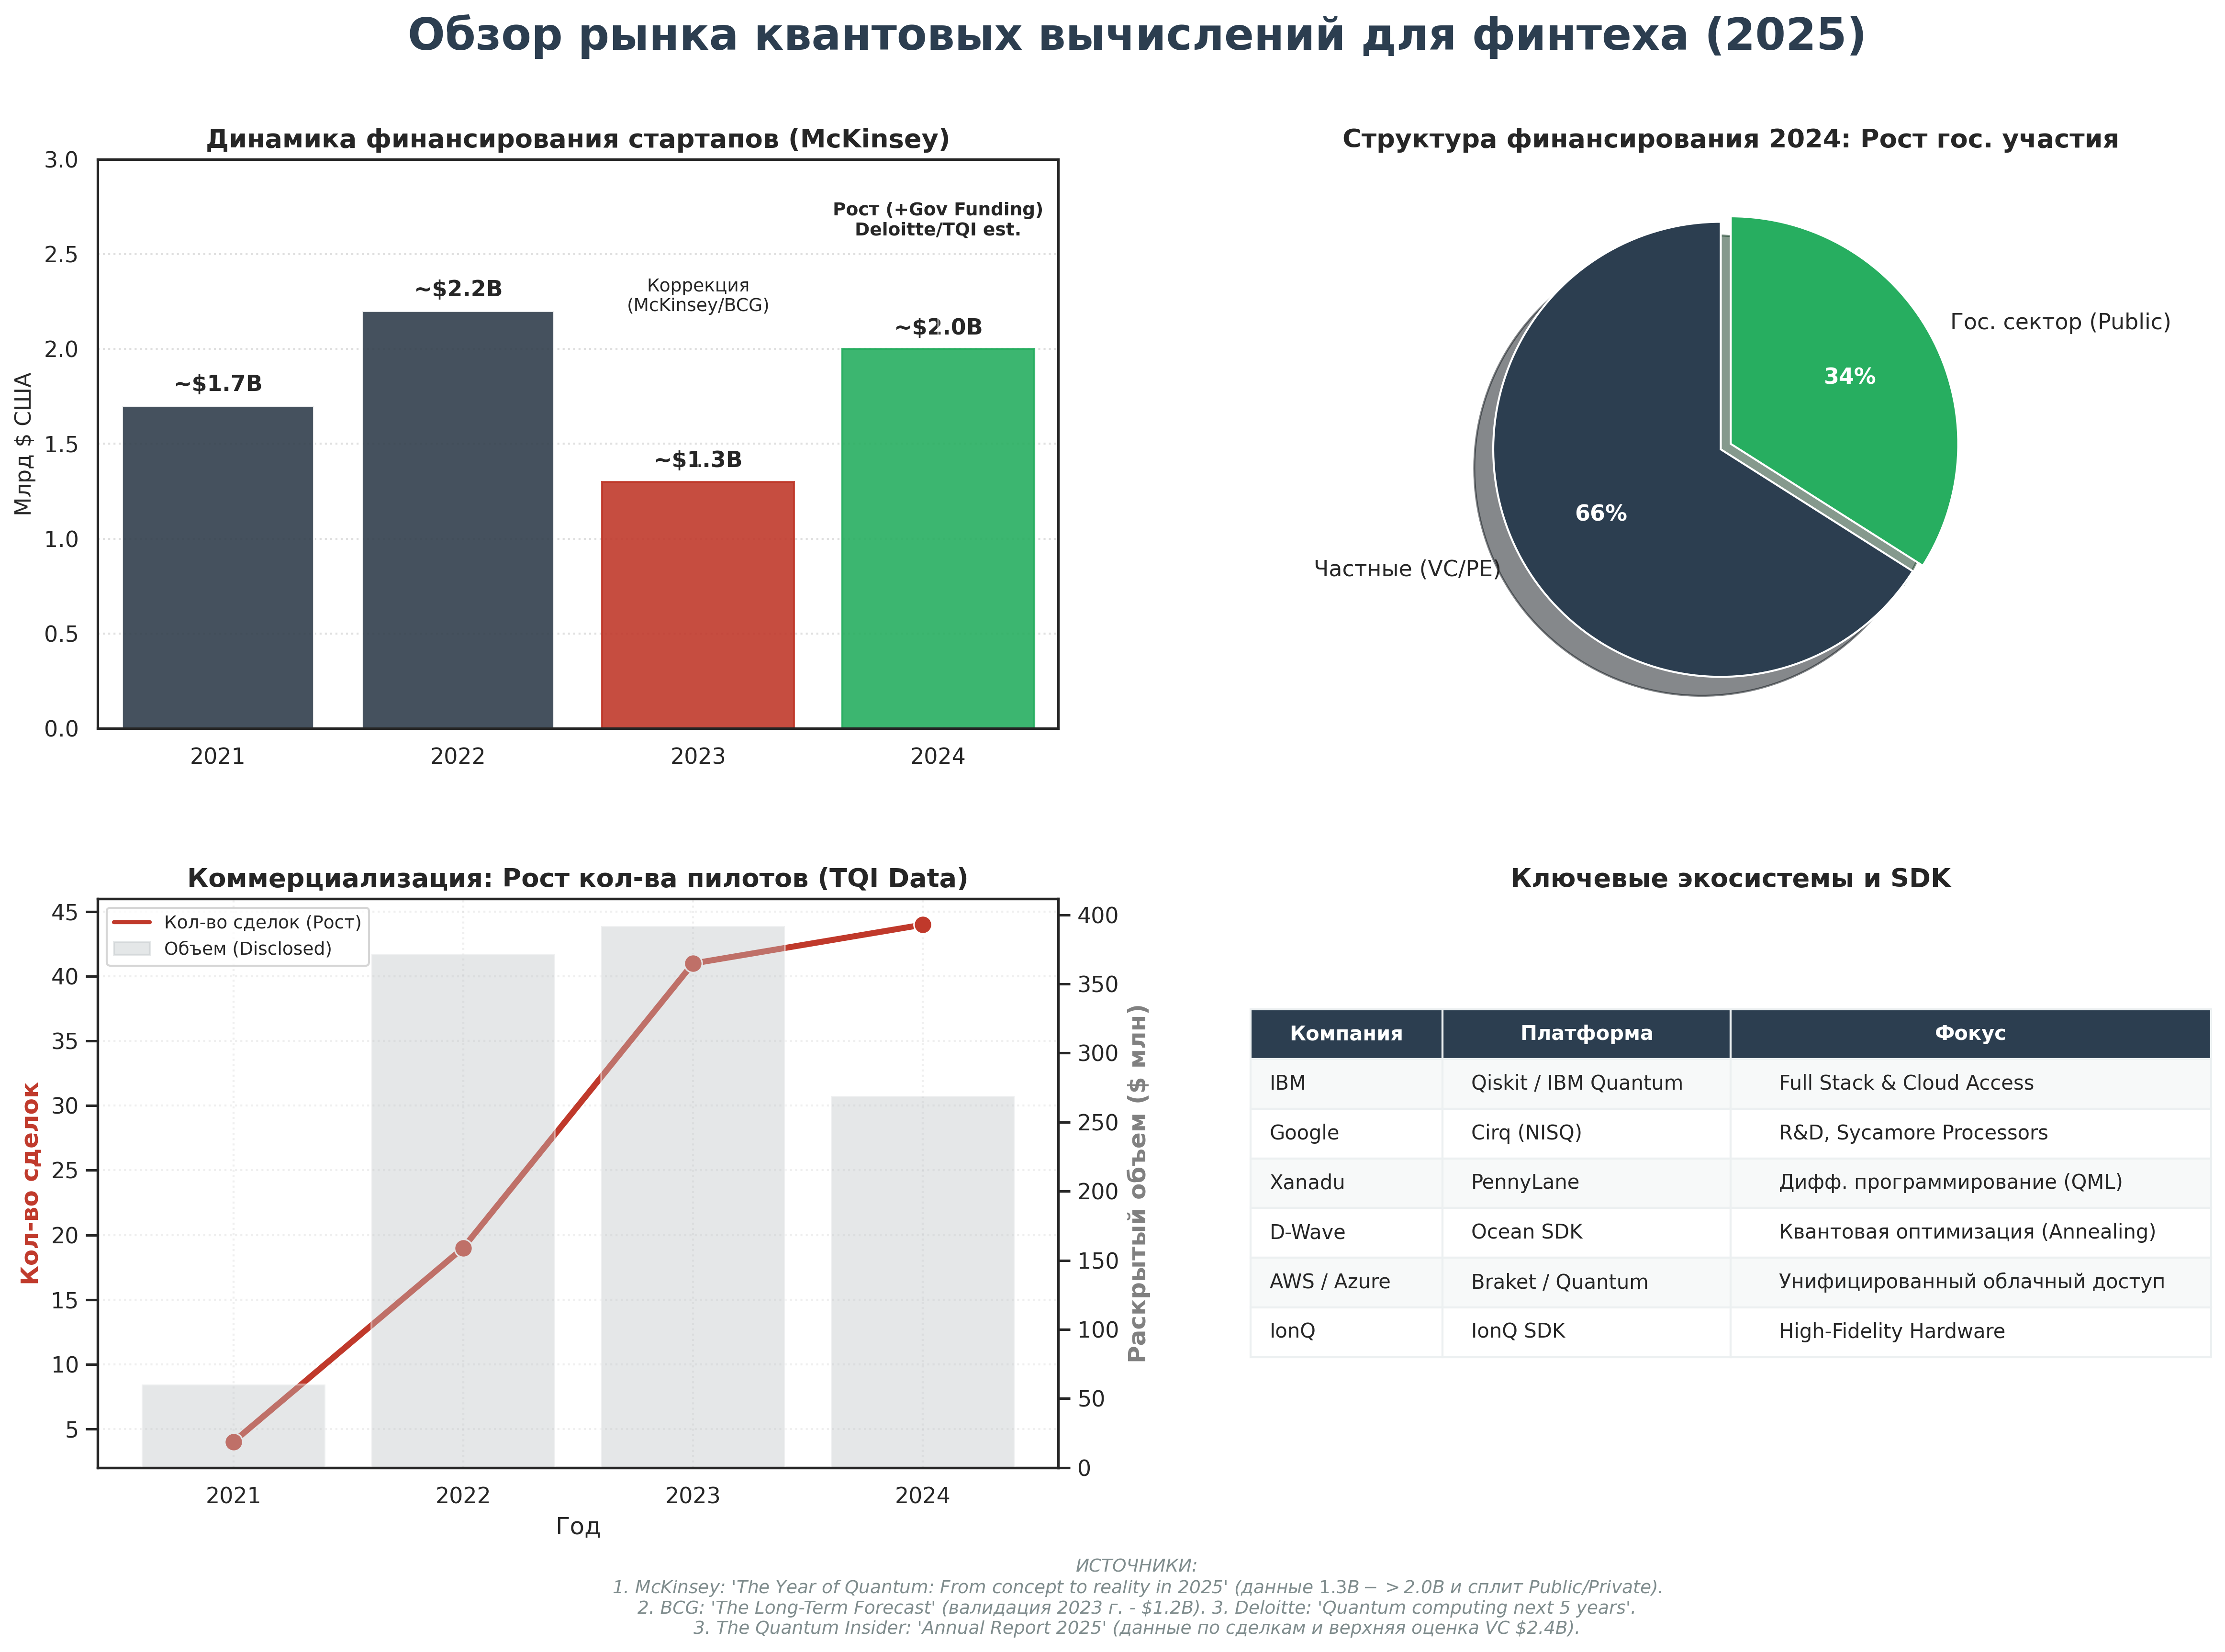



АНАЛИТИЧЕСКАЯ СПРАВКА: РЫНОК КВАНТОВЫХ ВЫЧИСЛЕНИЙ (Q1 2025)

1. МАКРОЭКОНОМИЧЕСКИЙ ОБЗОР И ДИНАМИКА КАПИТАЛА
Рынок завершил цикл коррекции (2023 г.) и демонстрирует V-образное восстановление.
Совокупный объем инвестиций в стартапы вырос с $1.3 млрд (2023) до ~$2.0 млрд (2024).

Ключевой драйвер роста — структурное изменение источников ликвидности:
• Государственное финансирование (Public Funding) заняло доминирующую роль в поддержке R&D.
• В 2024 году 34% всего притока капитала ($680 млн) обеспечено государственными грантами и субсидиями (без учета инфраструктурных вложений в размере $1.8 млрд).
• Частный венчурный капитал (VC) сохраняет осторожность, фокусируясь на зрелых проектах.

2. КОММЕРЦИАЛИЗАЦИЯ И СТРУКТУРА СДЕЛОК
Наблюдается дивергенция между количеством и объемом сделок:
• Количество коммерческих контрактов растет (44+ в 2024 году, CAGR +7% к 2023).
• Средний чек сделки (Average Ticket Size) снижается.
Вывод: Рынок переходит от фазы капиталоемких фундаментальных исследовани

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.patches as mpatches

# Стиль
sns.set_theme(style="white", rc={"axes.grid": True, "grid.linestyle": ":", "grid.alpha": 0.6})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 300

# ЧАСТЬ 1: ДАННЫЕ

# Данные по игрокам
players_data = [
    {"Компания": "IBM", "Платформа": "Qiskit / IBM Quantum", "Фокус": "Full Stack & Cloud Access"},
    {"Компания": "Google", "Платформа": "Cirq (NISQ)", "Фокус": "R&D, Sycamore Processors"},
    {"Компания": "Xanadu", "Платформа": "PennyLane", "Фокус": "Дифф. программирование (QML)"},
    {"Компания": "D-Wave", "Платформа": "Ocean SDK", "Фокус": "Квантовая оптимизация (Annealing)"},
    {"Компания": "AWS / Azure", "Платформа": "Braket / Quantum", "Фокус": "Унифицированный облачный доступ"},
    {"Компания": "IonQ", "Платформа": "IonQ SDK", "Фокус": "High-Fidelity Hardware"}
]
df_players = pd.DataFrame(players_data)

# McKinsey: Total Funding ($1.3B -> $2.0B)
investment_data = pd.DataFrame([
    {"Год": "2021", "Значение": 1.7}, # Исторические данные для контекста
    {"Год": "2022", "Значение": 2.2},
    {"Год": "2023", "Значение": 1.3}, # McKinsey data
    {"Год": "2024", "Значение": 2.0}, # McKinsey data (~$2.0B)
])

# McKinsey 2024 Split: $680M Public (34%) vs ~$1.3B Private
funding_split_2024 = pd.DataFrame([
    {"Тип": "Частные (VC/PE)", "Сумма": 1.32},
    {"Тип": "Гос. сектор (Public)", "Сумма": 0.68}
])

# TQI Data: Deals Dynamics
deals_data = pd.DataFrame([
    {"Год": "2021", "Количество": 4,  "Объем_млн": 60},
    {"Год": "2022", "Количество": 19, "Объем_млн": 372},
    {"Год": "2023", "Количество": 41, "Объем_млн": 392}, # TQI
    {"Год": "2024", "Количество": 44, "Объем_млн": 269}, # TQI (Снижение чека)
])


# ЧАСТЬ 2: ВИЗУАЛИЗАЦИЯ

def create_strategic_report():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Заголовок
    fig.suptitle('Обзор рынка квантовых вычислений для финтеха (2025)',
                 fontsize=22, weight='bold', color='#2c3e50', y=0.96)

    # Цвета
    main_blue = "#2c3e50"
    alert_red = "#c0392b"
    gov_green = "#27ae60"

    # 1. ТРЕНД ИНВЕСТИЦИЙ (McKinsey)
    ax1 = axes[0, 0]
    bars = sns.barplot(data=investment_data, x="Год", y="Значение", color=main_blue, ax=ax1, alpha=0.9)

    # Подсветка 2023 (спад) и 2024 (рост)
    bars.patches[2].set_color(alert_red)
    bars.patches[3].set_color(gov_green) # Рост за счет госденег

    ax1.set_title("Динамика финансирования стартапов (McKinsey)", fontsize=13, weight='bold')
    ax1.set_ylabel("Млрд $ США", fontsize=11)
    ax1.set_xlabel("")
    ax1.set_ylim(0, 3.0)

    for p in ax1.patches:
        ax1.annotate(f'~${p.get_height()}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', weight='bold', fontsize=11, xytext=(0, 5), textcoords='offset points')

    # Аннотации
    ax1.annotate('Коррекция\n(McKinsey/BCG)', xy=(2, 1.3), xytext=(2, 2.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5), ha='center', fontsize=9)
    ax1.annotate('Рост (+Gov Funding)\nDeloitte/TQI est.', xy=(3, 2.0), xytext=(3, 2.6),
                 arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5), ha='center', fontsize=9, weight='bold')

    # 2. СТРУКТУРА 2024 (McKinsey Public vs Private)
    ax2 = axes[0, 1]
    colors = [main_blue, gov_green]
    wedges, texts, autotexts = ax2.pie(funding_split_2024["Сумма"], labels=funding_split_2024["Тип"],
                                       autopct='%1.0f%%', startangle=90, colors=colors, explode=(0.05, 0), shadow=True)
    ax2.set_title("Структура финансирования 2024: Рост гос. участия", fontsize=13, weight='bold')
    plt.setp(autotexts, size=11, weight="bold", color="white")

    # 3. КОММЕРЧЕСКИЕ СДЕЛКИ (TQI)
    ax3 = axes[1, 0]
    ax3_twin = ax3.twinx()

    sns.barplot(data=deals_data, x="Год", y="Объем_млн", color="#bdc3c7", ax=ax3_twin, alpha=0.4)
    sns.lineplot(data=deals_data, x="Год", y="Количество", marker="o", color=alert_red, ax=ax3, linewidth=3, markersize=9, sort=False)

    ax3.set_title("Коммерциализация: Рост кол-ва пилотов (TQI Data)", fontsize=13, weight='bold')
    ax3.set_ylabel("Кол-во сделок", color=alert_red, weight='bold')
    ax3_twin.set_ylabel("Раскрытый объем ($ млн)", color="gray", weight='bold')
    ax3.grid(True, alpha=0.3)
    ax3_twin.grid(False)

    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=alert_red, lw=2, label='Кол-во сделок (Рост)'),
                       mpatches.Patch(color='#bdc3c7', alpha=0.4, label='Объем (Disclosed)')]
    ax3.legend(handles=legend_elements, loc='upper left', fontsize=9)

    # 4. ЭКОСИСТЕМА (Таблица)
    ax4 = axes[1, 1]
    ax4.axis('off')
    ax4.set_title("Ключевые экосистемы и SDK", fontsize=13, weight='bold')

    table = ax4.table(cellText=df_players.values, colLabels=df_players.columns, loc='center', cellLoc='left', colWidths=[0.2, 0.3, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.2)

    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#ecf0f1')
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(main_blue)
        else:
            cell.set_facecolor('#f7f9f9' if row % 2 else 'white')

    # ИСТОЧНИКИ
    sources = (
        "ИСТОЧНИКИ:\n"
        "1. McKinsey: 'The Year of Quantum: From concept to reality in 2025' (данные $1.3B -> $2.0B и сплит Public/Private).\n"
        "2. BCG: 'The Long-Term Forecast' (валидация 2023 г. - $1.2B). 3. Deloitte: 'Quantum computing next 5 years'.\n"
        "3. The Quantum Insider: 'Annual Report 2025' (данные по сделкам и верхняя оценка VC $2.4B)."
    )
    fig.text(0.5, 0.02, sources, ha='center', fontsize=9, color='#7f8c8d', style='italic')

    # Layout
    plt.tight_layout(rect=[0, 0.06, 1, 0.95])
    plt.subplots_adjust(hspace=0.3, wspace=0.2)

    plt.savefig('Quantum_Market_Analysis_2025_Final.png', dpi=300, bbox_inches='tight')
    plt.show()


# ЧАСТЬ 3: ГЕНЕРАТОР СООБЩЕНИЯ

def print_executive_summary():
    # Форматирование таблиц для вывода
    def format_table(df, title):
        return f"\n--- {title} ---\n" + df.to_markdown(index=False, tablefmt="grid")

    report_text = f"""

АНАЛИТИЧЕСКАЯ СПРАВКА: РЫНОК КВАНТОВЫХ ВЫЧИСЛЕНИЙ (Q1 2025)

1. МАКРОЭКОНОМИЧЕСКИЙ ОБЗОР И ДИНАМИКА КАПИТАЛА
Рынок завершил цикл коррекции (2023 г.) и демонстрирует V-образное восстановление.
Совокупный объем инвестиций в стартапы вырос с $1.3 млрд (2023) до ~$2.0 млрд (2024).

Ключевой драйвер роста — структурное изменение источников ликвидности:
• Государственное финансирование (Public Funding) заняло доминирующую роль в поддержке R&D.
• В 2024 году 34% всего притока капитала ($680 млн) обеспечено государственными грантами и субсидиями (без учета инфраструктурных вложений в размере $1.8 млрд).
• Частный венчурный капитал (VC) сохраняет осторожность, фокусируясь на зрелых проектах.

2. КОММЕРЦИАЛИЗАЦИЯ И СТРУКТУРА СДЕЛОК
Наблюдается дивергенция между количеством и объемом сделок:
• Количество коммерческих контрактов растет (44+ в 2024 году, CAGR +7% к 2023).
• Средний чек сделки (Average Ticket Size) снижается.
Вывод: Рынок переходит от фазы капиталоемких фундаментальных исследований к фазе прикладных пилотных проектов (Proof of Concept) с меньшим бюджетом, но более высокой частотой внедрения.

ПРИЛОЖЕНИЕ: СВОДНЫЕ ДАННЫЕ (DATA TABLES)

"""
    print(report_text)

    # Вывод таблиц
    try:
        print("\nТаблица 1. Динамика инвестиций (млрд $)")
        print(investment_data.to_string(index=False))

        print("\nТаблица 2. Структура финансирования (2024)")
        print(funding_split_2024.to_string(index=False))

        print("\nТаблица 3. Коммерческая активность (Сделки)")
        print(deals_data.to_string(index=False))

        print("\nТаблица 4. Ключевые технологические партнеры")
        # Выбираем только важные колонки для компактности
        print(df_players[["Компания", "Платформа", "Фокус"]].to_string(index=False))

    except Exception as e:
        print(f"Ошибка вывода таблиц: {e}")

    print("\n============================================================")

if __name__ == "__main__":
    create_strategic_report()
    print_executive_summary()

# [Прогноз развития рынка]

# Conclusion